In [1]:
import numpy as np
import pandas as pd
import json

aura_df = pd.read_csv("NSMES1988.csv")
aura_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,yes,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,no,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,yes,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,no,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,no,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,no,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,no,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,no,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,no,female,yes,12,3.877916,no,yes,no


Aura DataFrame Info

In [2]:
aura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  afam        4406 non-null   object 
 13  gender      4406 non-null   object 
 14  married     4406 non-null   object 
 15  school      4406 non-null   int64  
 16  income      4406 non-null   float64
 17  employed    4406 non-null   object 
 18  insurance   4406 non-null   object 
 19  medicaid    4406 non-null  

Aura DataFrame data types:

In [3]:
aura_df.dtypes

Unnamed: 0      int64
visits          int64
nvisits         int64
ovisits         int64
novisits        int64
emergency       int64
hospital        int64
health         object
chronic         int64
adl            object
region         object
age           float64
afam           object
gender         object
married        object
school          int64
income        float64
employed       object
insurance      object
medicaid       object
dtype: object

In [4]:
# unnamed 0 column (corrupt data - should be dropped from dataframe)
# health, region, afam, gender, married data type is object (corrupt data - should be category)
# employed, insurance, medicaid data type is object (corrupt data - should be boolean)

Aura DataFrame Description

In [5]:
aura_df.age.describe()

count    4406.000000
mean        7.402406
std         0.633405
min         6.600000
25%         6.900000
50%         7.300000
75%         7.800000
max        10.900000
Name: age, dtype: float64

In [6]:
# age range from 6.6 to 10.9 (corrupt data - should be 66 - 109)
# age data type is float64 (corrupt data - should be uint8)

In [7]:
aura_df.income.describe()

count    4406.000000
mean        2.527132
std         2.924648
min        -1.012500
25%         0.912150
50%         1.698150
75%         3.172850
max        54.835100
Name: income, dtype: float64

In [8]:
# income range from -1.01 to 54.84 (corrupt data - should be positive value)
# income data type is float64 (corrupt data - should be float16)

In [9]:
aura_df[aura_df.income < 0]

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
909,910,10,0,0,0,0,0,poor,1,normal,other,7.8,no,male,yes,12,-1.0125,no,no,no
910,911,9,2,0,0,0,0,average,1,normal,other,7.5,no,female,yes,14,-1.0125,no,no,no
2592,2593,6,0,0,0,0,0,average,4,normal,west,6.9,no,male,yes,6,-0.8180,no,yes,no


In [10]:
aura_df.isnull().sum()

Unnamed: 0    0
visits        0
nvisits       0
ovisits       0
novisits      0
emergency     0
hospital      0
health        0
chronic       0
adl           0
region        0
age           0
afam          0
gender        0
married       0
school        0
income        0
employed      0
insurance     0
medicaid      0
dtype: int64

In [11]:
# there is no missing data

In [12]:
aura_df.drop('Unnamed: 0', axis=1, inplace=True)
aura_df

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,6.9,yes,male,yes,6,2.881000,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,7.4,no,female,yes,10,2.747800,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,6.6,yes,female,no,10,0.653200,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,7.6,no,male,yes,3,0.658800,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,7.9,no,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,normal,other,8.4,no,female,yes,8,2.249700,no,yes,no
4402,12,0,0,0,0,0,average,2,normal,other,7.8,no,female,no,11,5.813200,no,yes,no
4403,10,0,20,0,1,1,average,5,normal,other,7.3,no,male,yes,12,3.877916,no,yes,no
4404,16,1,0,0,0,0,average,0,normal,other,6.6,no,female,yes,12,3.877916,no,yes,no


Fix age:

In [13]:
aura_df['age'] = aura_df['age'] * 10
aura_df['age'] = aura_df['age'].astype('uint8')
aura_df

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,yes,male,yes,6,2.881000,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74,no,female,yes,10,2.747800,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66,yes,female,no,10,0.653200,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76,no,male,yes,3,0.658800,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79,no,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,normal,other,84,no,female,yes,8,2.249700,no,yes,no
4402,12,0,0,0,0,0,average,2,normal,other,78,no,female,no,11,5.813200,no,yes,no
4403,10,0,20,0,1,1,average,5,normal,other,73,no,male,yes,12,3.877916,no,yes,no
4404,16,1,0,0,0,0,average,0,normal,other,66,no,female,yes,12,3.877916,no,yes,no


In [14]:
# replace yes/no cells with 1/0 so the LLM can actually use the numerical data

In [15]:
yes_no = {'yes':1, 'no':0}
yes_no_columns = ['afam', 'married', 'employed', 'insurance', 'medicaid']
aura_df[yes_no_columns] = aura_df[yes_no_columns].replace(yes_no)
aura_df[yes_no_columns] = aura_df[yes_no_columns].astype('uint8')
aura_df

/var/folders/_8/7k3l29n14j91jpxpd6v9rmtw0000gn/T/ipykernel_333/3602872080.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aura_df[yes_no_columns] = aura_df[yes_no_columns].replace(yes_no)


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,1,male,1,6,2.881000,1,1,0
1,1,0,2,0,2,0,average,2,normal,other,74,0,female,1,10,2.747800,0,1,0
2,13,0,0,0,3,3,poor,4,limited,other,66,1,female,0,10,0.653200,0,0,1
3,16,0,5,0,1,1,poor,2,limited,other,76,0,male,1,3,0.658800,0,1,0
4,3,0,0,0,0,0,average,2,limited,other,79,0,female,1,6,0.658800,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,normal,other,84,0,female,1,8,2.249700,0,1,0
4402,12,0,0,0,0,0,average,2,normal,other,78,0,female,0,11,5.813200,0,1,0
4403,10,0,20,0,1,1,average,5,normal,other,73,0,male,1,12,3.877916,0,1,0
4404,16,1,0,0,0,0,average,0,normal,other,66,0,female,1,12,3.877916,0,1,0


In [16]:
# set columns of category data type

In [17]:
category_columns = ['health', 'adl', 'gender', 'region']
aura_df[category_columns] = aura_df[category_columns].astype('category')
aura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   visits     4406 non-null   int64   
 1   nvisits    4406 non-null   int64   
 2   ovisits    4406 non-null   int64   
 3   novisits   4406 non-null   int64   
 4   emergency  4406 non-null   int64   
 5   hospital   4406 non-null   int64   
 6   health     4406 non-null   category
 7   chronic    4406 non-null   int64   
 8   adl        4406 non-null   category
 9   region     4406 non-null   category
 10  age        4406 non-null   uint8   
 11  afam       4406 non-null   uint8   
 12  gender     4406 non-null   category
 13  married    4406 non-null   uint8   
 14  school     4406 non-null   int64   
 15  income     4406 non-null   float64 
 16  employed   4406 non-null   uint8   
 17  insurance  4406 non-null   uint8   
 18  medicaid   4406 non-null   uint8   
dtypes: category(4), float64(1),

Optimizing data by reducing memory size:

In [18]:
int64_columns = aura_df.select_dtypes('int64').columns
aura_df[int64_columns].describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,school
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,10.290286
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,3.738736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,18.000000


In [19]:
aura_df[int64_columns] = aura_df[int64_columns].astype('int16')
aura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   visits     4406 non-null   int16   
 1   nvisits    4406 non-null   int16   
 2   ovisits    4406 non-null   int16   
 3   novisits   4406 non-null   int16   
 4   emergency  4406 non-null   int16   
 5   hospital   4406 non-null   int16   
 6   health     4406 non-null   category
 7   chronic    4406 non-null   int16   
 8   adl        4406 non-null   category
 9   region     4406 non-null   category
 10  age        4406 non-null   uint8   
 11  afam       4406 non-null   uint8   
 12  gender     4406 non-null   category
 13  married    4406 non-null   uint8   
 14  school     4406 non-null   int16   
 15  income     4406 non-null   float64 
 16  employed   4406 non-null   uint8   
 17  insurance  4406 non-null   uint8   
 18  medicaid   4406 non-null   uint8   
dtypes: category(4), float64(1),

In [20]:
float64_columns = aura_df.select_dtypes('float64').columns
aura_df[float64_columns] = aura_df[float64_columns].astype('float16')
aura_df[float64_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  4406 non-null   float16
dtypes: float16(1)
memory usage: 8.7 KB


In [21]:
# fix negative income
aura_df.loc[aura_df.income < 0, 'income'] = 0
aura_df.income.describe()

count    4406.000000
mean        2.525391
std         2.921875
min         0.000000
25%         0.912231
50%         1.697754
75%         3.173340
max        54.843750
Name: income, dtype: float64

Exported optimized data to a CSV and PKL file:

In [22]:
aura_df.to_csv("NSMES1988_optimized.csv", index=False)
optimized_aura_df = pd.read_csv("NSMES1988_optimized.csv")
optimized_aura_df.info()

# to preserve the data types, export dataframe to a pkl file

aura_df.to_pickle("NSMES1988_optimized.pkl")
optimized_aura_df = pd.read_pickle("NSMES1988_optimized.pkl")
optimized_aura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   int64  
 11  afam       4406 non-null   int64  
 12  gender     4406 non-null   object 
 13  married    4406 non-null   int64  
 14  school     4406 non-null   int64  
 15  income     4406 non-null   float64
 16  employed   4406 non-null   int64  
 17  insurance  4406 non-null   int64  
 18  medicaid   4406 non-null   int64  
dtypes: float64(1), int64(14), object(4)
memory usage

In [23]:
# Show significant correlations
#aura_df.corr()[abs(aura_df.corr()) > 0.25].fillna(0).style.background_gradient(cmap='Spectral', axis=None)

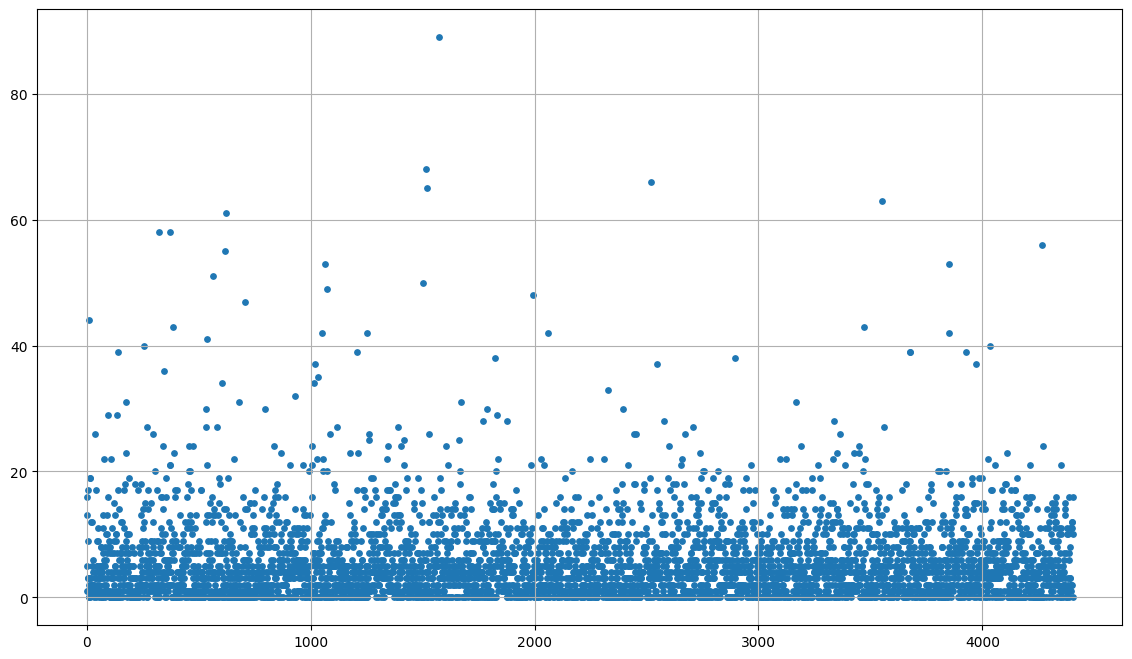

In [24]:
# short report detailing visual observations such as number of visits
import matplotlib.pyplot as plt

x = aura_df.index
y = aura_df.visits

plt.figure(figsize=(14,8))
plt.grid()
plt.scatter(x, y, s=15)

(array([3.406e+03, 7.970e+02, 1.380e+02, 2.700e+01, 2.100e+01, 7.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <BarContainer object of 10 artists>)

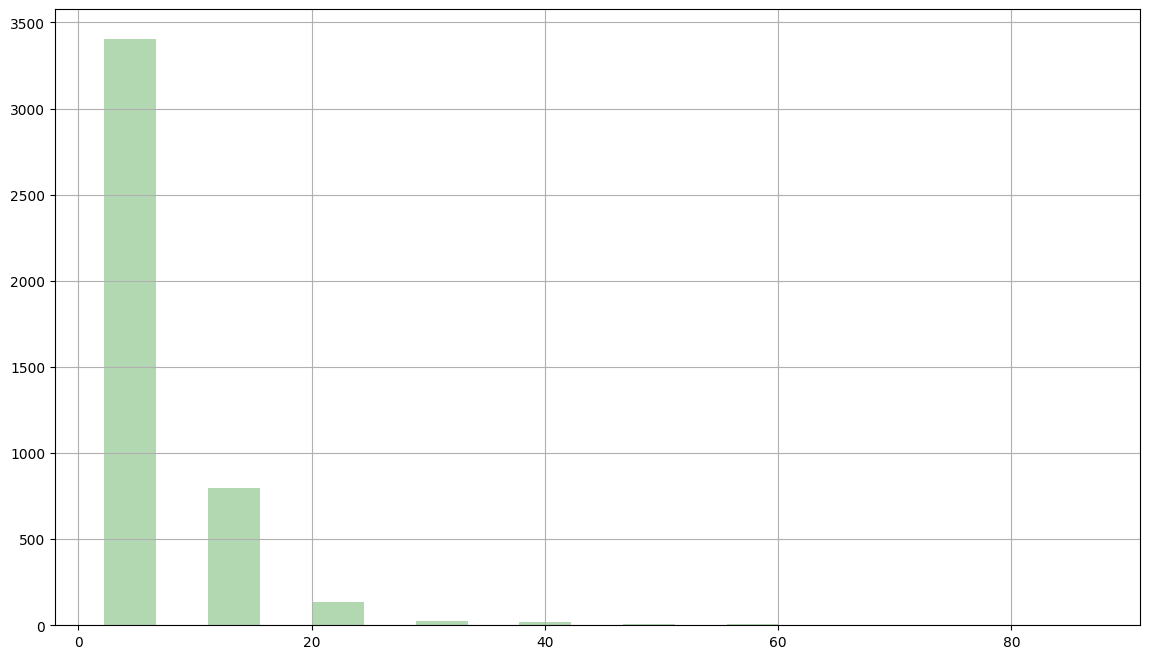

In [25]:
plt.figure(figsize=(14,8))
plt.grid()
plt.hist(aura_df.visits, bins=10, color='g', alpha=0.3, rwidth=0.5)

In [26]:
optimized_aura_df

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,afam,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69,1,male,1,6,2.880859,1,1,0
1,1,0,2,0,2,0,average,2,normal,other,74,0,female,1,10,2.748047,0,1,0
2,13,0,0,0,3,3,poor,4,limited,other,66,1,female,0,10,0.653320,0,0,1
3,16,0,5,0,1,1,poor,2,limited,other,76,0,male,1,3,0.658691,0,1,0
4,3,0,0,0,0,0,average,2,limited,other,79,0,female,1,6,0.658691,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,normal,other,84,0,female,1,8,2.250000,0,1,0
4402,12,0,0,0,0,0,average,2,normal,other,78,0,female,0,11,5.812500,0,1,0
4403,10,0,20,0,1,1,average,5,normal,other,73,0,male,1,12,3.876953,0,1,0
4404,16,1,0,0,0,0,average,0,normal,other,66,0,female,1,12,3.876953,0,1,0


In [28]:
# multiply income by 10 to correct the corrupted data depicting income as X.xx

optimized_aura_df['income'] = optimized_aura_df['income'] * 10
optimized_aura_df['income']

0       28.812500
1       27.484375
2        6.531250
3        6.585938
4        6.585938
          ...    
4401    22.500000
4402    58.125000
4403    38.781250
4404    38.781250
4405    66.000000
Name: income, Length: 4406, dtype: float16

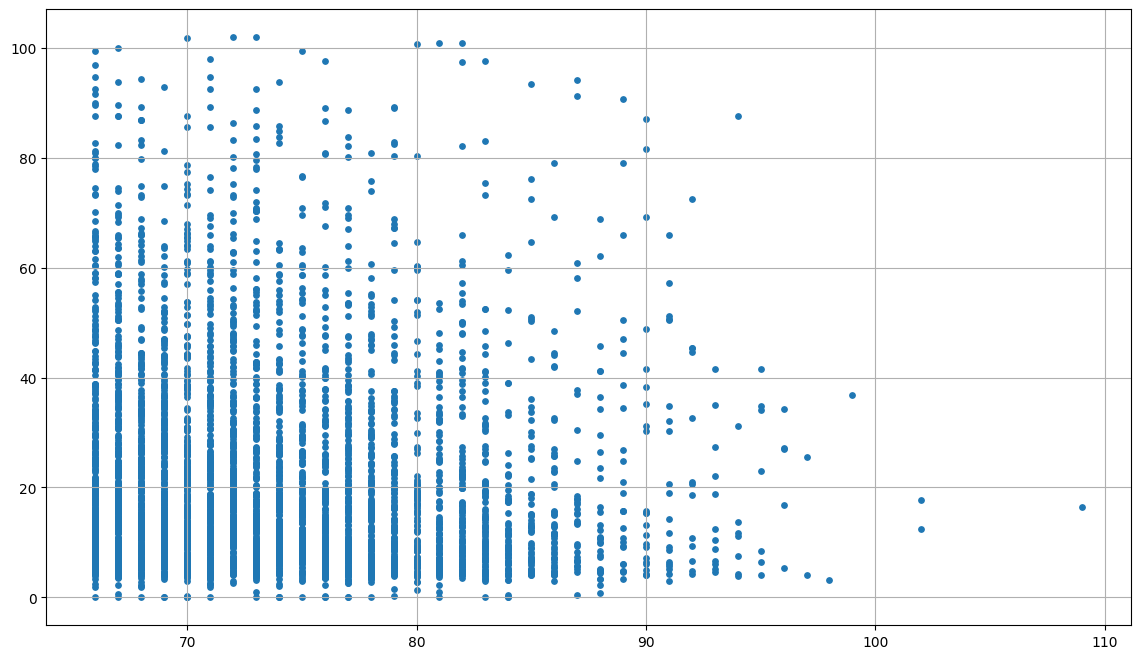

In [44]:
df_quant = optimized_aura_df.income.quantile(0.98)
filtered_data = optimized_aura_df[optimized_aura_df.income < df_quant]

plt.figure(figsize=(14,8))
plt.grid()
plt.scatter(filtered_data.age, filtered_data.income, s=15)

The highest income band occurs under the age of 80.

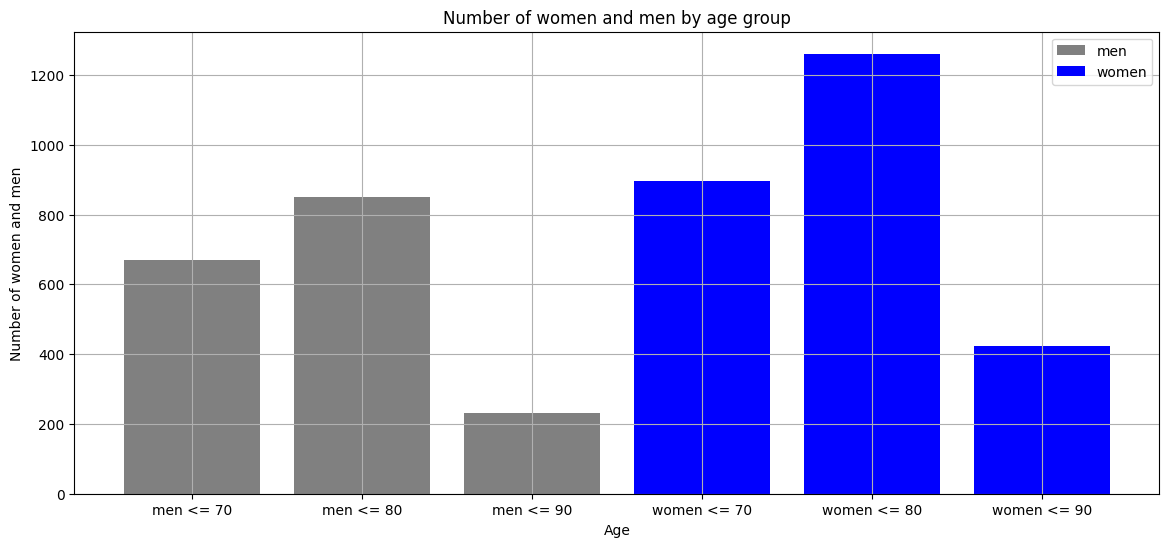

In [80]:
# visualize how many women and men there are by age groups

grp_women = optimized_aura_df[optimized_aura_df['gender']=='female']
grp_men = optimized_aura_df[optimized_aura_df['gender']=='male']

grp_women_70 = grp_women[grp_women['age'] <= 70].shape[0]
grp_men_70 = grp_men[grp_men['age'] <= 70].shape[0]

grp_women_80 = grp_women[(grp_women['age'] > 70) & (grp_women['age'] <= 80)].shape[0]
grp_men_80 = grp_men[(grp_men['age'] > 70) & (grp_men['age'] <= 80)].shape[0]

grp_women_90 = grp_women[(grp_women['age'] > 80) & (grp_women['age'] <= 90)].shape[0]
grp_men_90 = grp_men[(grp_men['age'] > 80) & (grp_men['age'] <= 90)].shape[0]

plt.figure(figsize=(14,6))
plt.grid()
plt.bar(['men <= 70', 'men <= 80', 'men <= 90'],[grp_men_70, grp_men_80, grp_men_90], color='gray', label='men')
plt.bar(['women <= 70', 'women <= 80', 'women <= 90'],[grp_women_70, grp_women_80, grp_women_90], color='blue', label='women')
plt.xlabel('Age')
plt.ylabel('Number of women and men')
plt.title('Number of women and men by age group')
plt.legend()
plt.show()

Most men and women are between ages 71 and 80.
Women between ages 71 and 80 consist of the largest age group by gender.
Men between ages 81 and 90 consist of the smallest age group by gender.

In [82]:
optimized_aura_df.age.describe()

count    4406.000000
mean       74.024058
std         6.334050
min        66.000000
25%        69.000000
50%        73.000000
75%        78.000000
max       109.000000
Name: age, dtype: float64

When we describe our dataframe, we confirm most men and women are between ages 71 and 80.

In [83]:
optimized_aura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   visits     4406 non-null   int16   
 1   nvisits    4406 non-null   int16   
 2   ovisits    4406 non-null   int16   
 3   novisits   4406 non-null   int16   
 4   emergency  4406 non-null   int16   
 5   hospital   4406 non-null   int16   
 6   health     4406 non-null   category
 7   chronic    4406 non-null   int16   
 8   adl        4406 non-null   category
 9   region     4406 non-null   category
 10  age        4406 non-null   uint8   
 11  afam       4406 non-null   uint8   
 12  gender     4406 non-null   category
 13  married    4406 non-null   uint8   
 14  school     4406 non-null   int16   
 15  income     4406 non-null   float16 
 16  employed   4406 non-null   uint8   
 17  insurance  4406 non-null   uint8   
 18  medicaid   4406 non-null   uint8   
dtypes: category(4), float16(1),

All members in the 'novisits' column have a value of 0, and therefore this data is not usable for statistical analysis.

In [85]:
optimized_aura_df.to_csv("NSMES1988_optimized_v2.csv", index=False)
optimized_aura_df_v2 = pd.read_csv("NSMES1988_optimized_v2.csv")

optimized_aura_df.to_pickle("NSMES1988_optimized_v2.pkl")
optimized_aura_df_v2 = pd.read_pickle("NSMES1988_optimized_v2.pkl")
optimized_aura_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   visits     4406 non-null   int16   
 1   nvisits    4406 non-null   int16   
 2   ovisits    4406 non-null   int16   
 3   novisits   4406 non-null   int16   
 4   emergency  4406 non-null   int16   
 5   hospital   4406 non-null   int16   
 6   health     4406 non-null   category
 7   chronic    4406 non-null   int16   
 8   adl        4406 non-null   category
 9   region     4406 non-null   category
 10  age        4406 non-null   uint8   
 11  afam       4406 non-null   uint8   
 12  gender     4406 non-null   category
 13  married    4406 non-null   uint8   
 14  school     4406 non-null   int16   
 15  income     4406 non-null   float16 
 16  employed   4406 non-null   uint8   
 17  insurance  4406 non-null   uint8   
 18  medicaid   4406 non-null   uint8   
dtypes: category(4), float16(1),